## Reestructure data

In [ ]:
!gdown 1syYsaowRdc4E2CftBhNVoDkOwhXEVJur

Downloading...
From: https://drive.google.com/uc?id=1syYsaowRdc4E2CftBhNVoDkOwhXEVJur
To: /content/disease_archive.zip
100% 30.8k/30.8k [00:00<00:00, 48.1MB/s]


In [ ]:
!unzip disease_archive.zip

Archive:  disease_archive.zip
replace Symptom-severity.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Symptom-severity.csv    
  inflating: dataset.csv             
  inflating: symptom_Description.csv  
  inflating: symptom_precaution.csv  


In [ ]:
import pandas as pd
df = pd.read_csv("dataset.csv")
df.shape

(4920, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [ ]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [ ]:
import numpy as np
ctgr_set = set()
for col in df.drop('Disease', axis=1).columns:
    for i in df[col].unique():
        ctgr_set.add(i)
if np.nan in ctgr_set:
    ctgr_set.remove(np.nan)
print(ctgr_set)
print(len(ctgr_set))

{' passage_of_gases', ' excessive_hunger', ' muscle_weakness', ' prominent_veins_on_calf', ' neck_pain', ' vomiting', ' mild_fever', ' silver_like_dusting', ' dark_urine', ' lack_of_concentration', ' coma', ' stomach_bleeding', ' breathlessness', ' hip_joint_pain', ' nodal_skin_eruptions', ' irritation_in_anus', ' receiving_blood_transfusion', ' swollen_extremeties', ' rusty_sputum', ' chills', ' extra_marital_contacts', ' scurring', ' small_dents_in_nails', ' stomach_pain', ' visual_disturbances', ' yellowish_skin', ' internal_itching', ' enlarged_thyroid', ' fatigue', ' muscle_pain', ' loss_of_appetite', ' depression', ' weakness_in_limbs', ' inflammatory_nails', ' irregular_sugar_level', ' phlegm', ' congestion', ' receiving_unsterile_injections', ' weight_gain', ' headache', ' swelled_lymph_nodes', ' dischromic _patches', ' yellow_crust_ooze', ' abnormal_menstruation', ' nausea', ' redness_of_eyes', ' dehydration', ' abdominal_pain', ' foul_smell_of urine', ' weakness_of_one_body_s

In [ ]:
mydf = df
for category in ctgr_set:
    mydf[category] = df.apply(lambda row: 1 if category in row.values else 0, axis=1).astype(bool)
mydf.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,pus_filled_pimples,yellowing_of_eyes,swollen_legs,obesity,acute_liver_failure,irritability,mucoid_sputum,continuous_sneezing,weight_loss,loss_of_smell
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
ctgrs = list(ctgr_set)
ordered_df = mydf[ctgrs]
ordered_df['disease'] = df['Disease']
ordered_df.head()

<ipython-input-112-c5f2fd63bba0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordered_df['disease'] = df['Disease']


,passage_of_gases,excessive_hunger,muscle_weakness,prominent_veins_on_calf,neck_pain,vomiting,mild_fever,silver_like_dusting,dark_urine,lack_of_concentration,...,yellowing_of_eyes,swollen_legs,obesity,acute_liver_failure,irritability,mucoid_sputum,continuous_sneezing,weight_loss,loss_of_smell,disease
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Fungal infection
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Fungal infection
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Fungal infection
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Fungal infection
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Fungal infection


In [ ]:
print("NaN's =", len(ordered_df[ordered_df.isna().any(axis=1)]))

NaN's = 0


In [ ]:
ordered_df.shape

(4920, 132)

In [ ]:
ordered_df.to_csv("reordered_dataset.csv", sep=";", index=False)

##Vizualization of data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("reordered_dataset.csv", sep=";")
df.head()

,passage_of_gases,excessive_hunger,muscle_weakness,prominent_veins_on_calf,neck_pain,vomiting,mild_fever,silver_like_dusting,dark_urine,lack_of_concentration,...,yellowing_of_eyes,swollen_legs,obesity,acute_liver_failure,irritability,mucoid_sputum,continuous_sneezing,weight_loss,loss_of_smell,disease
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Fungal infection
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Fungal infection
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Fungal infection
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Fungal infection
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Fungal infection


Examinamos las posibles enfermedades a predecir

In [ ]:
df['disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

Verificamos que no existen tuplas con datos faltantes


In [ ]:
df[df.isna().any(axis=1)]

,passage_of_gases,excessive_hunger,muscle_weakness,prominent_veins_on_calf,neck_pain,vomiting,mild_fever,silver_like_dusting,dark_urine,lack_of_concentration,...,yellowing_of_eyes,swollen_legs,obesity,acute_liver_failure,irritability,mucoid_sputum,continuous_sneezing,weight_loss,loss_of_smell,disease


Separamos los datos input del valor esperado y ordenamos los nombres de las columnas

In [ ]:
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
X = df.drop('disease', axis=1)
X.head()

,passage_of_gases,excessive_hunger,muscle_weakness,prominent_veins_on_calf,neck_pain,vomiting,mild_fever,silver_like_dusting,dark_urine,lack_of_concentration,...,pus_filled_pimples,yellowing_of_eyes,swollen_legs,obesity,acute_liver_failure,irritability,mucoid_sputum,continuous_sneezing,weight_loss,loss_of_smell
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Revisamos los tipos de datos de las columnas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 132 entries, passage_of_gases to disease
dtypes: bool(131), object(1)
memory usage: 668.0+ KB


In [ ]:
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
import seaborn as sns
import matplotlib.pyplot as plt
import math

[Text(0, 0, 'passage_of_gases'),
 Text(1, 0, 'excessive_hunger'),
 Text(2, 0, 'muscle_weakness'),
 Text(3, 0, 'prominent_veins_on_calf'),
 Text(4, 0, 'neck_pain'),
 Text(5, 0, 'vomiting'),
 Text(6, 0, 'mild_fever'),
 Text(7, 0, 'silver_like_dusting'),
 Text(8, 0, 'dark_urine'),
 Text(9, 0, 'lack_of_concentration'),
 Text(10, 0, 'coma'),
 Text(11, 0, 'stomach_bleeding'),
 Text(12, 0, 'breathlessness'),
 Text(13, 0, 'hip_joint_pain'),
 Text(14, 0, 'nodal_skin_eruptions'),
 Text(15, 0, 'irritation_in_anus'),
 Text(16, 0, 'receiving_blood_transfusion'),
 Text(17, 0, 'swollen_extremeties'),
 Text(18, 0, 'rusty_sputum'),
 Text(19, 0, 'chills'),
 Text(20, 0, 'extra_marital_contacts'),
 Text(21, 0, 'scurring'),
 Text(22, 0, 'small_dents_in_nails'),
 Text(23, 0, 'stomach_pain'),
 Text(24, 0, 'visual_disturbances'),
 Text(25, 0, 'yellowish_skin'),
 Text(26, 0, 'internal_itching'),
 Text(27, 0, 'enlarged_thyroid'),
 Text(28, 0, 'fatigue'),
 Text(29, 0, 'muscle_pain'),
 Text(30, 0, 'loss_of_appeti

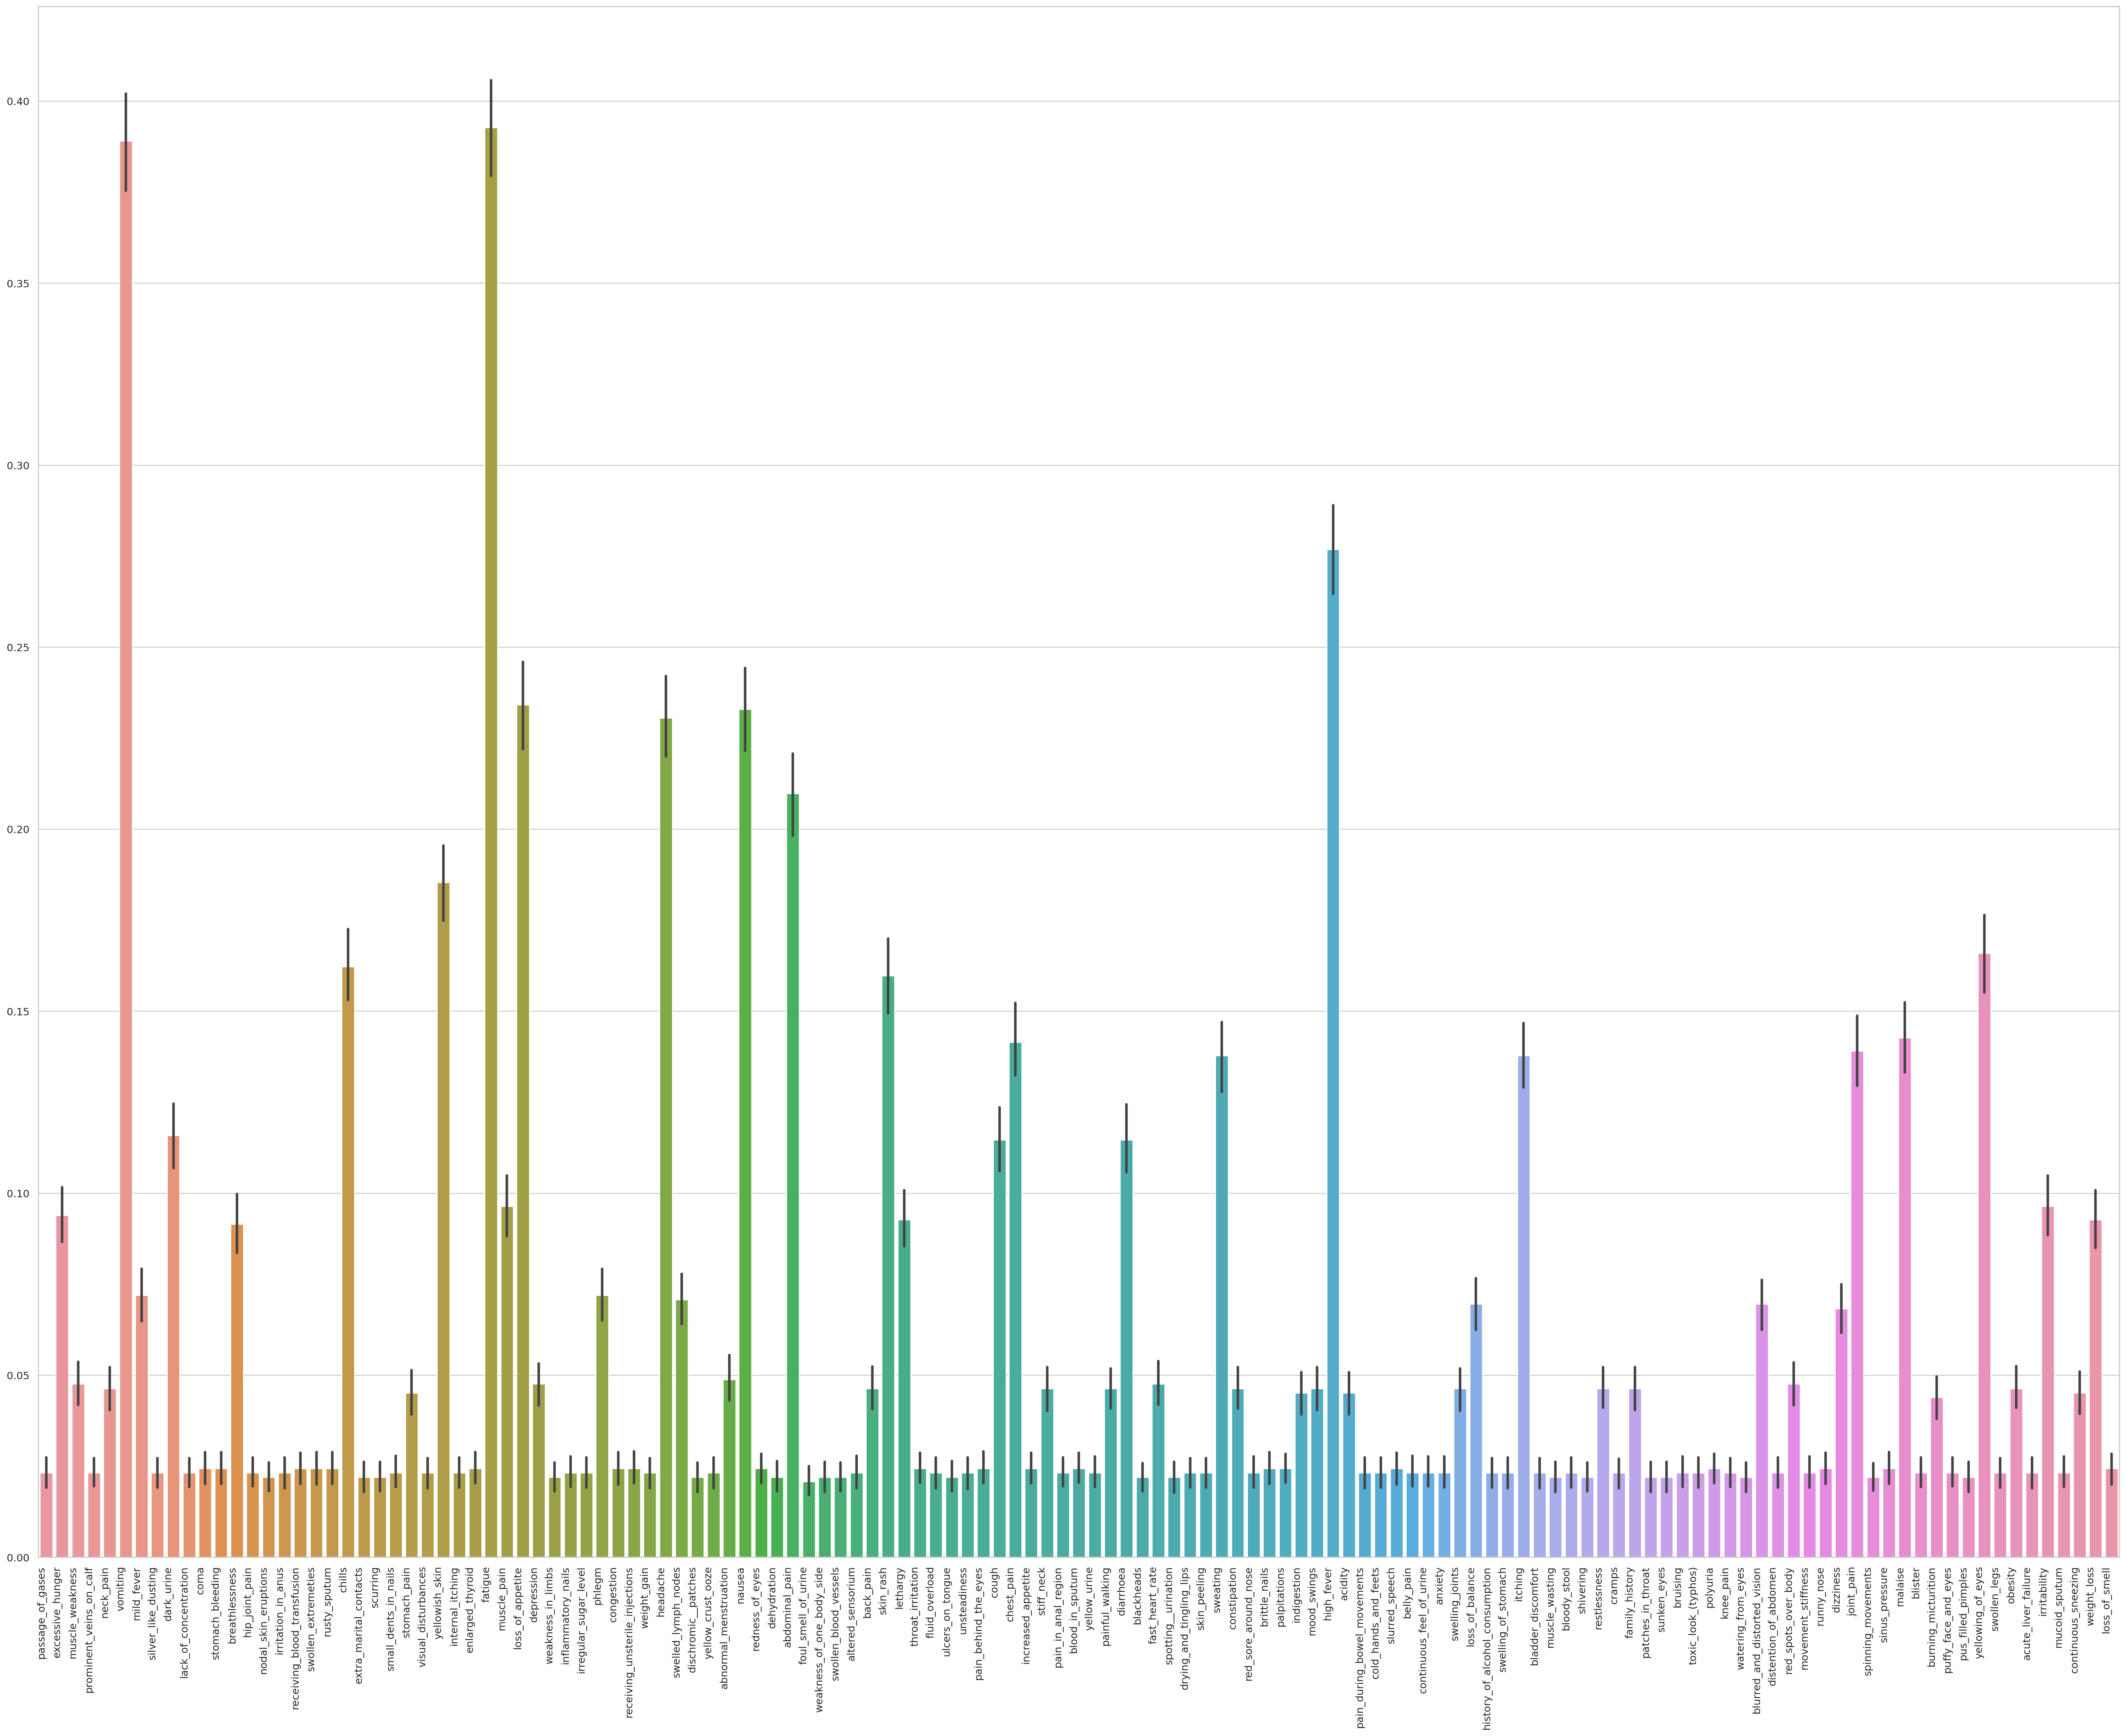

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(40, 30), dpi=200)
sns.set(font_scale=0.5)
sns.set(style="whitegrid")
ax = sns.barplot(X)
#ax.set_title('Distribución porcentual de sintomas por caso')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

## Evaluación de correlación

In [ ]:
X_corr = X.corr()
X_corr_heat = X_corr**2
X_corr.head()

,passage_of_gases,excessive_hunger,muscle_weakness,prominent_veins_on_calf,neck_pain,vomiting,mild_fever,silver_like_dusting,dark_urine,lack_of_concentration,...,pus_filled_pimples,yellowing_of_eyes,swollen_legs,obesity,acute_liver_failure,irritability,mucoid_sputum,continuous_sneezing,weight_loss,loss_of_smell
passage_of_gases,1.000000,-0.049581,-0.034417,-0.023720,-0.033951,0.176385,-0.042884,-0.023720,-0.055751,-0.023720,...,-0.023073,-0.068676,-0.023720,-0.033951,-0.023720,-0.050288,-0.023720,-0.033480,-0.049224,-0.024352
excessive_hunger,-0.049581,1.000000,0.301286,-0.049581,-0.070964,-0.093944,-0.089636,-0.049581,-0.116532,-0.049581,...,-0.048228,-0.143546,-0.049581,0.287010,-0.049581,0.702543,-0.049581,-0.069980,0.416130,-0.050900
muscle_weakness,-0.034417,0.301286,1.000000,-0.034417,-0.049260,-0.178313,-0.062221,-0.034417,-0.080891,-0.034417,...,-0.033478,-0.099643,-0.034417,-0.049260,-0.034417,0.315421,-0.034417,-0.048577,0.303998,-0.035333
prominent_veins_on_calf,-0.023720,-0.049581,-0.034417,1.000000,-0.033951,-0.122896,-0.042884,-0.023720,-0.055751,-0.023720,...,-0.023073,-0.068676,0.946120,0.660111,-0.023720,-0.050288,-0.023720,-0.033480,-0.049224,-0.024352
neck_pain,-0.033951,-0.070964,-0.049260,-0.033951,1.000000,-0.175900,-0.061379,-0.033951,-0.079796,-0.033951,...,-0.033025,-0.098295,-0.033951,-0.048593,-0.033951,-0.071977,-0.033951,-0.047919,-0.070455,-0.034854


Visualizacion de correlacion mediante mapa de calor usando el cuadrado de la correlación

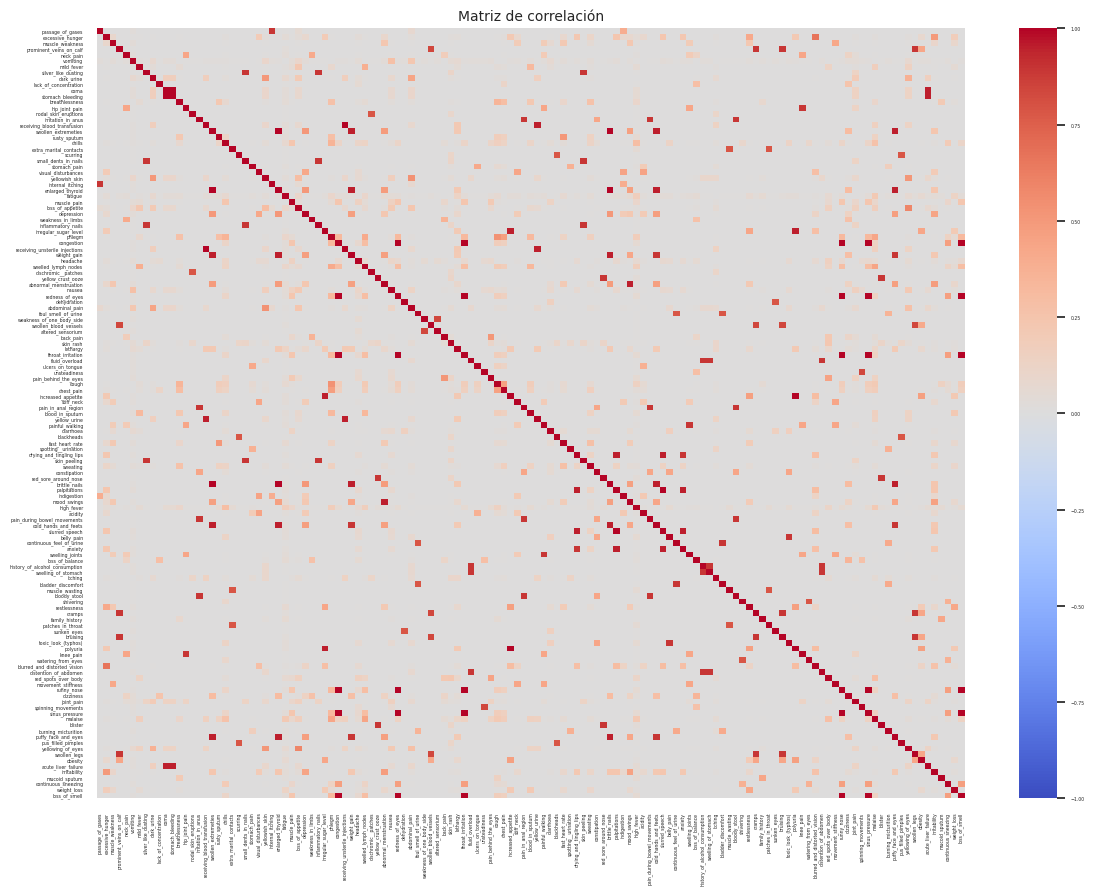

In [ ]:
sns.set(font_scale=0.3)
plt.figure(figsize=(14, 10))
sns.heatmap(X_corr_heat, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0)
plt.title('Matriz de correlación', fontsize=10)
plt.show()

Uso de un mapa clusterizado

<Figure size 4000x4000 with 0 Axes>

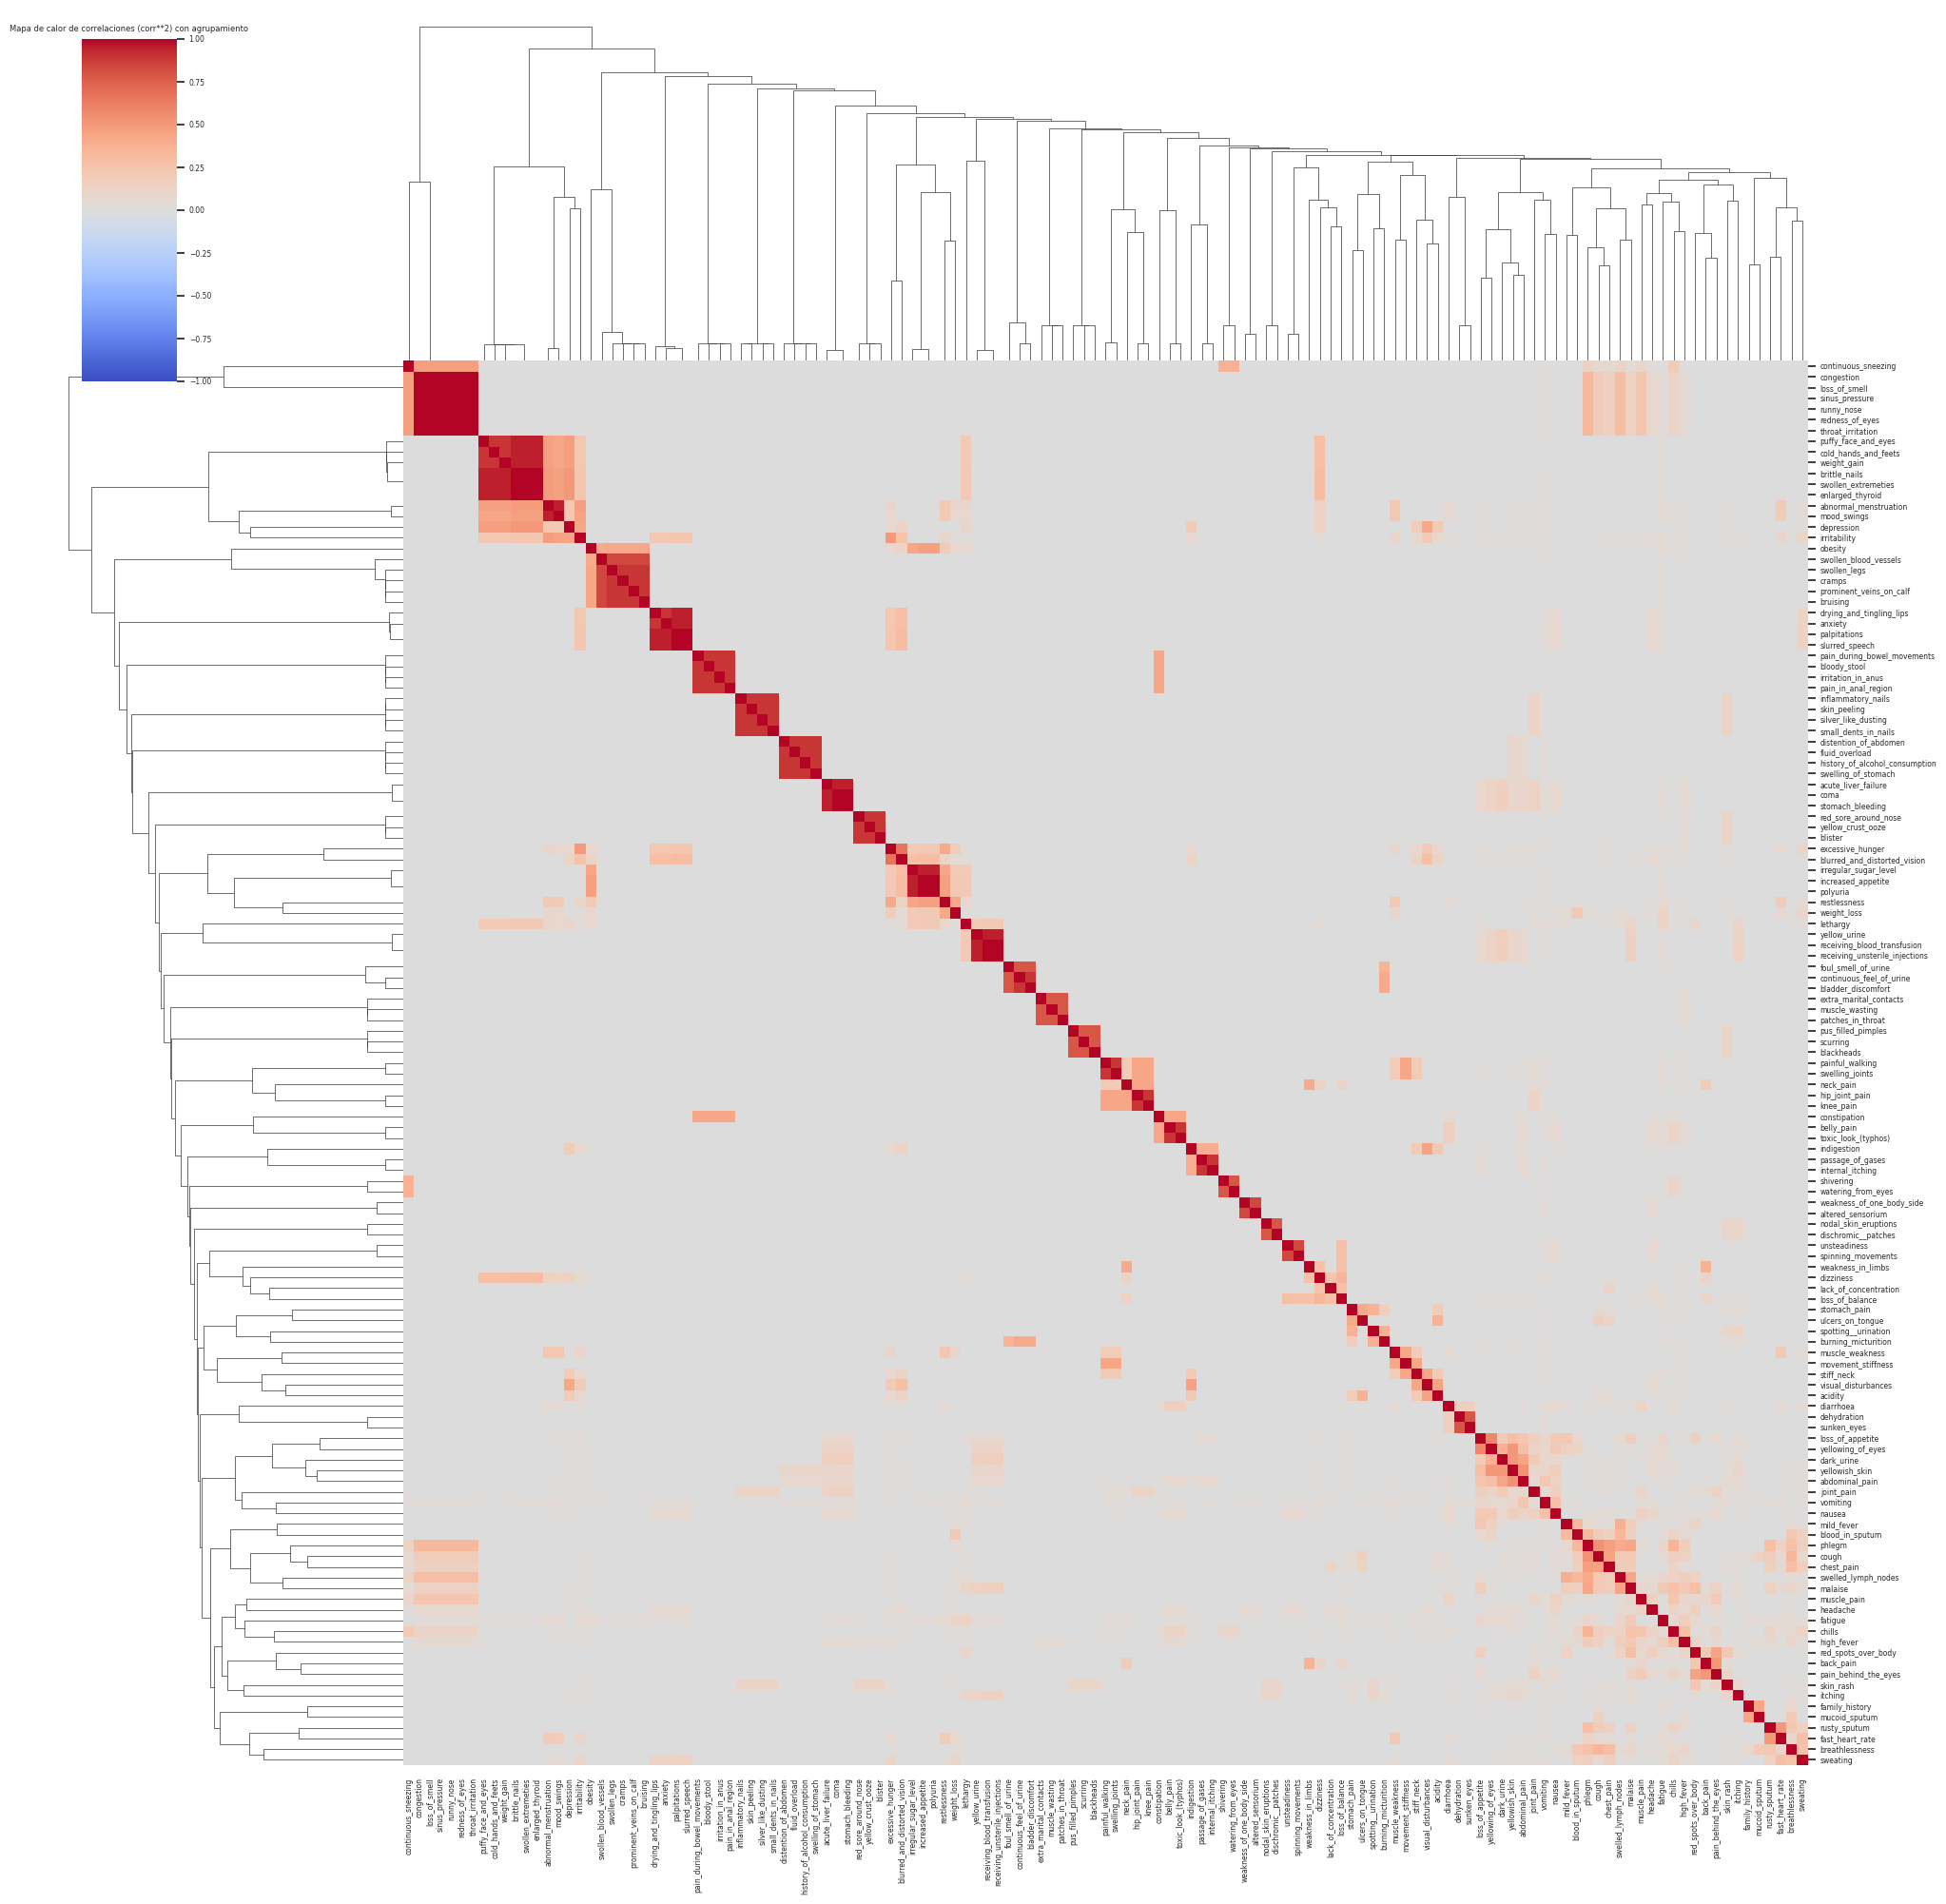

In [ ]:
sns.set(font_scale=0.5)
plt.figure(figsize=(20, 20), dpi=200)
sns.clustermap(X_corr_heat, annot=False, cmap='coolwarm', vmin=-1, vmax=1, figsize=(20, 20))
plt.title('Mapa de calor de correlaciones (corr**2) con agrupamiento')
plt.show()

Podemos observar muchos datos con alta correlacion en el mapa anterior y alta dependencia en la jerarquia en el siguiente grafico

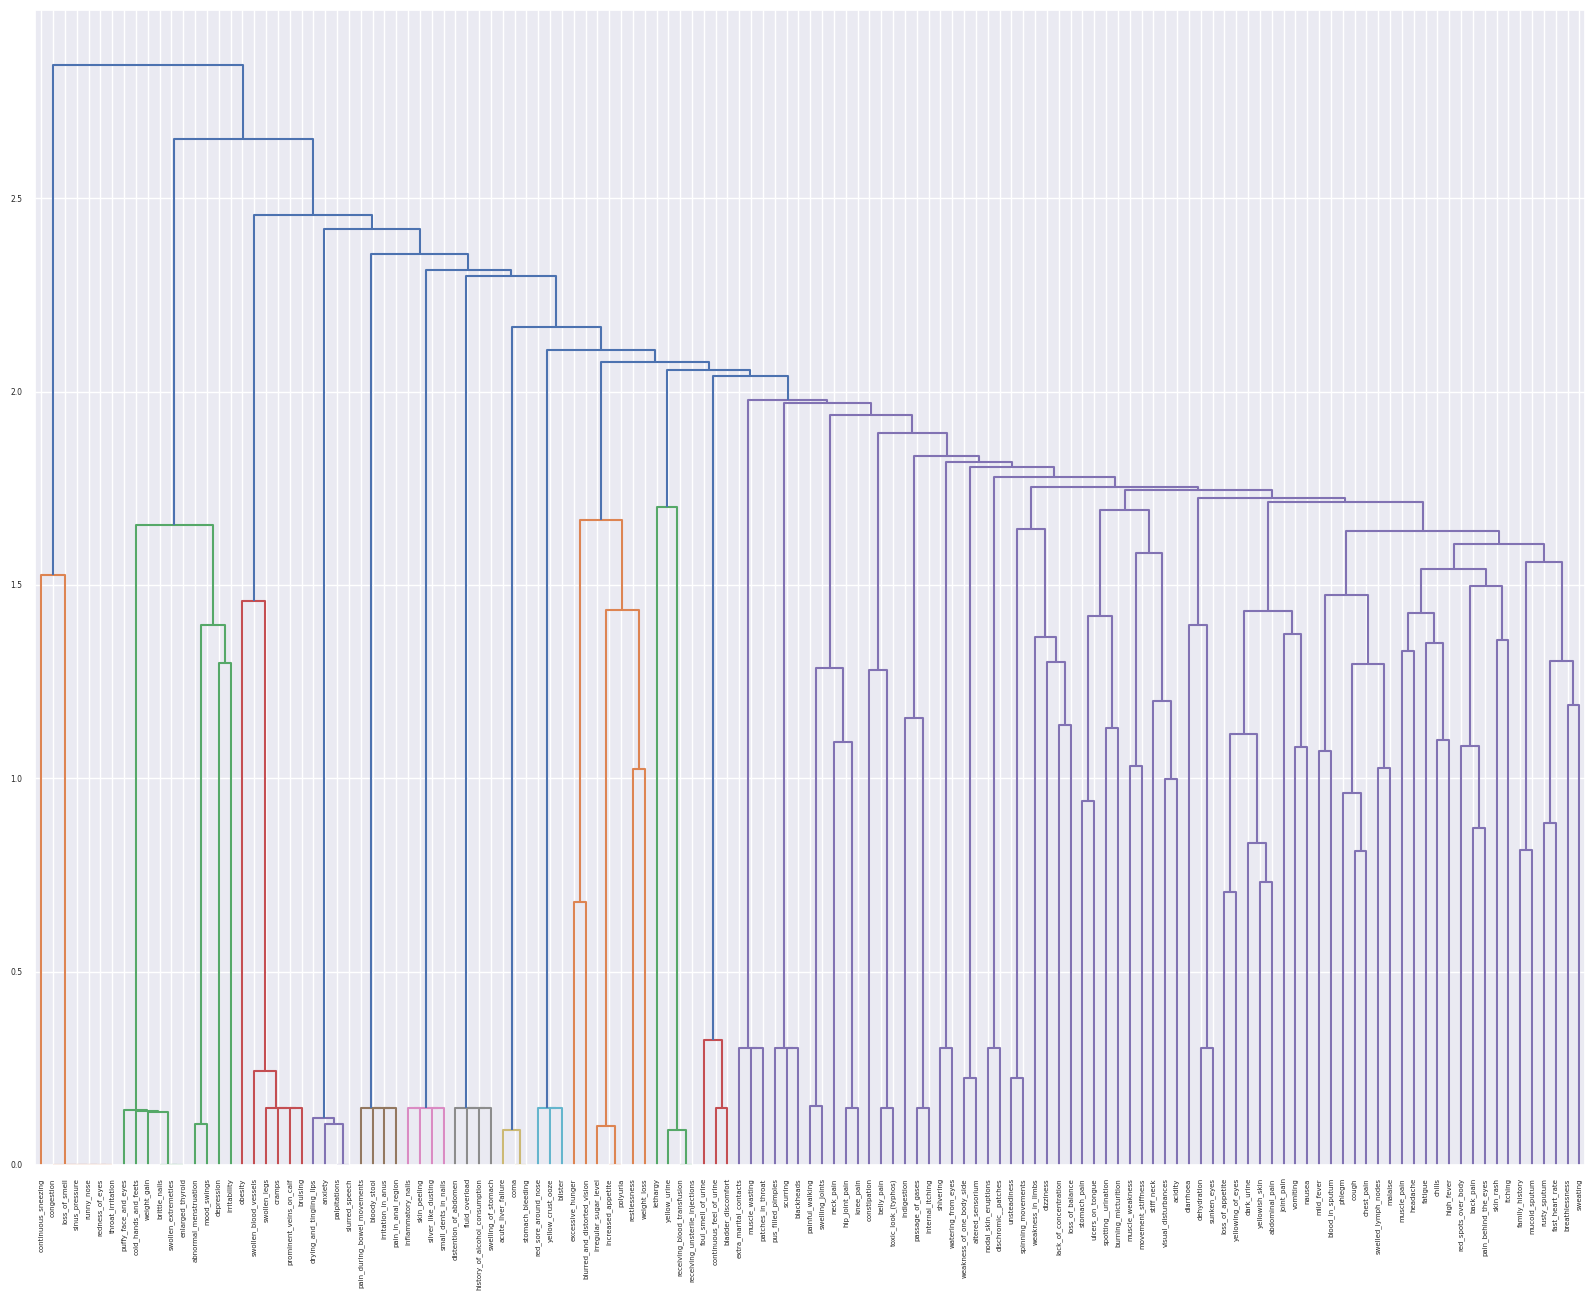

In [ ]:
links = hierarchy.linkage(X_corr_heat, method='average')

plt.figure(figsize=(20, 15))
dendrogram = hierarchy.dendrogram(links, labels=X_corr_heat.columns)

## Reducción de dimensionalidad

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Definimos nuevamente los valores de input y labels

In [ ]:
X = df.drop('disease', axis=1)
y = df['disease']

Realizamos una prueba de relevancia usando ForestClassifier y podemos observar una baja relevancia en diferentes variables


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

print("Importancias según el modelo de bosque aleatorio:")
model_data = list(zip(X.columns, model.feature_importances_))
pd.DataFrame
sorted(model_data, key=lambda x: x[1], reverse=True)

Importancias según el modelo de bosque aleatorio:


[('muscle_pain', 0.021148218389250958),
 ('itching', 0.01598234283493681),
 ('mild_fever', 0.015937496375439068),
 ('dark_urine', 0.0155280686521419),
 ('yellowing_of_eyes', 0.015036411396850696),
 ('altered_sensorium', 0.01408621701380448),
 ('chest_pain', 0.013852773226888628),
 ('sweating', 0.01357318385907032),
 ('high_fever', 0.01355038177254054),
 ('muscle_weakness', 0.013455633064670427),
 ('nausea', 0.013272302155785376),
 ('fatigue', 0.0131885693887621),
 ('vomiting', 0.013056252599810678),
 ('joint_pain', 0.013023254706334163),
 ('family_history', 0.013020625747071728),
 ('unsteadiness', 0.012670336975035295),
 ('lack_of_concentration', 0.01220698655365811),
 ('loss_of_appetite', 0.012028824636646895),
 ('abdominal_pain', 0.011666545658069613),
 ('breathlessness', 0.011335449986461106),
 ('weight_loss', 0.010852701822252403),
 ('coma', 0.010569004782149173),
 ('dischromic__patches', 0.010497721663553528),
 ('headache', 0.010436138700789178),
 ('pain_behind_the_eyes', 0.010416

**PCA**

En base a lo visualizado se decide usar una reduccion dimensional mediante el uso de la técnica PCA (Principal Component Analysis)

In [ ]:
from sklearn.decomposition import PCA

Evalumos los resultados de la varianza total para diferentes números de componentes generados por el procedimiento PCA

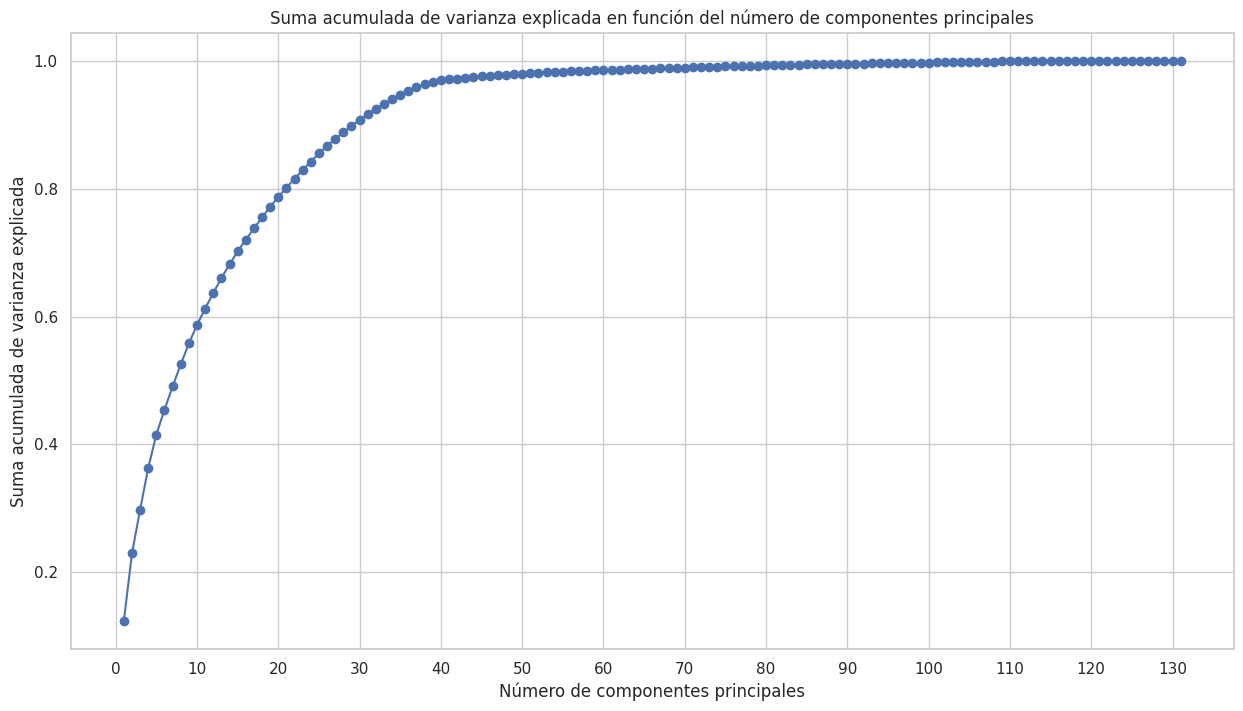

In [ ]:
variance_explained_sum = []

# Itera sobre el número de columnas
for i in range(len(X.columns)):
    pca = PCA(n_components=i+1, random_state=10)  # Ajusta el número de componentes según tu necesidad
    reduced_features = pca.fit_transform(X)
    variance_explained_sum.append(np.sum(pca.explained_variance_ratio_))

# Crea un gráfico de la suma acumulada de la varianza explicada
components = range(1, len(X.columns) + 1)
plt.figure(figsize=(15, 8))
plt.plot(components, variance_explained_sum, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Suma acumulada de varianza explicada')
plt.title('Suma acumulada de varianza explicada en función del número de componentes principales')
plt.xticks(np.arange(0, len(X.columns) + 1, 10))
plt.show()

Se opto por el uso de 41 componentes generados de los 131 variables por la aceleracion decreciente cerca de esos puntos y por el porcentaje de varianza explicada total. Finalmente se observa que se conserva el 97% de la varianza original por cual se trata de una reducción posiblemente óptima.

In [ ]:
pca = PCA(n_components=41, random_state=10)

reduced_features = pca.fit_transform(X)

# Convertir datos a un dataframe
df_reduced = pd.DataFrame(reduced_features, columns=[f'component{i}' for i in range(reduced_features.shape[1])])

print(np.sum(pca.explained_variance_ratio_))
df_reduced

0.9707998895266322


,component0,component1,component2,component3,component4,component5,component6,component7,component8,component9,...,component31,component32,component33,component34,component35,component36,component37,component38,component39,component40
0,-0.719803,-0.346616,-0.266001,-0.677252,0.502691,-0.452997,0.079459,-0.318811,-0.411696,0.288949,...,0.293694,0.322852,-0.447544,0.792268,0.073647,0.302189,-0.183544,-0.159706,0.004563,-0.017370
1,-0.795054,-0.281661,-0.330283,-0.457979,0.332691,-0.311877,-0.117961,-0.215977,-0.113383,0.138094,...,0.242365,0.278380,-0.430957,0.824913,0.126402,0.442177,-0.221343,-0.408405,-0.044462,0.068473
2,-0.672693,-0.362812,-0.145696,-0.513302,0.110873,-0.205831,0.203543,-0.069569,-0.348305,0.186094,...,0.277648,0.311421,-0.443168,0.783835,0.061442,0.170881,-0.212695,-0.091149,0.026786,0.071969
3,-0.700027,-0.335602,-0.253136,-0.644393,0.474104,-0.417268,0.072877,-0.291340,-0.373902,0.258254,...,0.184021,0.195338,-0.244970,0.394255,0.033911,0.134085,-0.056131,-0.015180,0.001861,-0.021324
4,-0.700027,-0.335602,-0.253136,-0.644393,0.474104,-0.417268,0.072877,-0.291340,-0.373902,0.258254,...,0.184029,0.195351,-0.244966,0.394218,0.033897,0.134058,-0.056151,-0.015163,0.001655,-0.019497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,-0.111642,-0.328168,-0.777747,0.986269,0.169720,0.241812,0.385031,-0.156141,-0.111729,-0.630365,...,0.443983,-0.598221,-0.035998,0.023521,0.025012,0.151227,0.012197,-0.057530,-0.062810,0.010007
4916,-0.822590,-0.287458,-0.356195,-0.462238,0.336358,-0.319659,-0.178031,-0.221586,-0.052609,0.114691,...,-0.214853,-0.144744,0.085148,-0.066653,-0.103424,-0.166643,-0.035287,0.091181,0.016266,-0.025074
4917,-0.819912,-0.330428,-0.249014,-0.333758,-0.122471,-0.048092,0.011878,0.088240,-0.032802,0.012966,...,-0.039288,0.006397,-0.295931,0.261130,-0.080726,-0.176919,-0.009569,0.051297,0.008024,-0.030805
4918,-0.668786,-0.424701,-0.476140,-0.505607,0.535802,-0.333296,-0.601199,-0.317400,0.671381,0.239243,...,0.019253,0.044856,0.129914,-0.013265,-0.082074,-0.205639,-0.045719,0.018879,-0.016454,-0.017722


In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

for i, ratio in enumerate(explained_variance_ratio):
    print(f"Componente {i}: {ratio:.4f}")

Componente 0: 0.1242
Componente 1: 0.1052
Componente 2: 0.0684
Componente 3: 0.0654
Componente 4: 0.0521
Componente 5: 0.0387
Componente 6: 0.0365
Componente 7: 0.0343
Componente 8: 0.0331
Componente 9: 0.0286
Componente 10: 0.0258
Componente 11: 0.0241
Componente 12: 0.0237
Componente 13: 0.0215
Componente 14: 0.0203
Componente 15: 0.0184
Componente 16: 0.0177
Componente 17: 0.0172
Componente 18: 0.0164
Componente 19: 0.0154
Componente 20: 0.0147
Componente 21: 0.0140
Componente 22: 0.0135
Componente 23: 0.0132
Componente 24: 0.0128
Componente 25: 0.0117
Componente 26: 0.0107
Componente 27: 0.0104
Componente 28: 0.0100
Componente 29: 0.0096
Componente 30: 0.0090
Componente 31: 0.0085
Componente 32: 0.0081
Componente 33: 0.0071
Componente 34: 0.0064
Componente 35: 0.0063
Componente 36: 0.0058
Componente 37: 0.0047
Componente 38: 0.0039
Componente 39: 0.0020
Componente 40: 0.0016


Visualizamos la variazna por cada componente

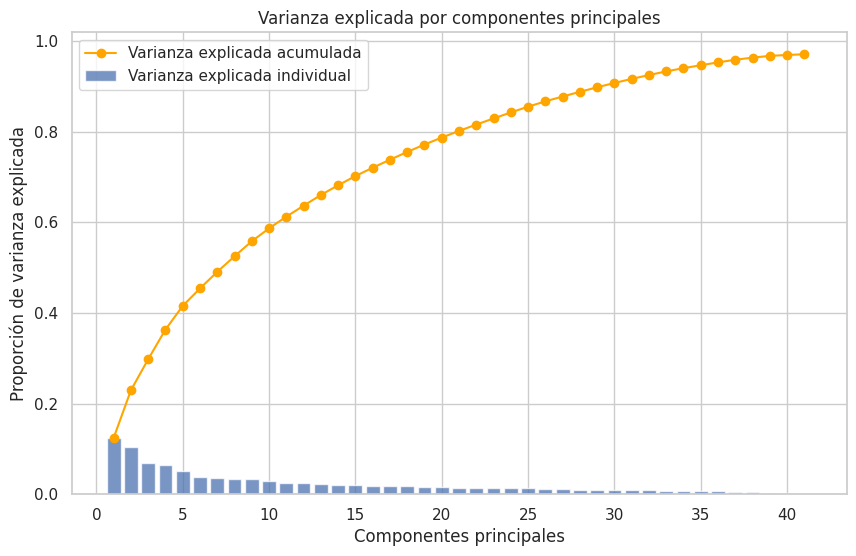

In [ ]:
components = range(1, len(explained_variance_ratio) + 1)
plt.figure(figsize=(10, 6))
plt.bar(components, explained_variance_ratio, alpha=0.75, label='Varianza explicada individual')
plt.plot(components, cumulative_variance_ratio, c='orange', marker='o', label='Varianza explicada acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.title('Varianza explicada por componentes principales')
plt.legend(loc='best')
plt.show()


Modelo guardado

En esta sección unicamente se guardaron los datos y los modelos para su uso en la aplicación

In [ ]:
from joblib import dump

In [ ]:
dump(pca, 'pca.joblib')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['disease'])

LabelEncoder()

In [ ]:
dump(le, 'disease_encoder.joblib')

['disease_encoder.joblib']

Crear dataset usando componentes

In [ ]:
df_reduced['result'] = le.transform(df['disease'])

In [ ]:
df.to_csv("brute_data.csv", sep=";", index=False)

In [ ]:
df_reduced.to_csv("data.csv", sep=";", index=False)